#Background

A supermarket is a large retail store that offers a wide range of daily necessities and consumer products under one roof, designed for convenient shopping with competitive pricing and various additional services.

By acquiring customer data, supermarkets can conduct customer analysis. The purpose of this analysis is to gain a deep understanding of consumer purchasing behaviors. By examining customer data including demographics, product preferences, purchasing patterns, responses to promotions, and purchase locations, supermarkets can identify consumer trends, improve targeted marketing strategies, and develop tactics to maximize supermarket profits.

#Objectives

Customer data analysis is conducted to understand customers so that the supermarket can increase profits through data-driven strategies such as marketing strategies to boost sales.

General Problem:

Supermarket profitability isn't optimal.


Problem Statement:
- How is the distribution of supermarket customer demographics (e.g., age, education, marital status, income)?
- How is expenditure by product categories and the association between product categories?
- What is the relationship between the distribution of supermarket customer demographics and their spending across different product categories?
- How are the results of the promotional campaign conducted by the supermarket?
- How do customers of a supermarket use shopping channels?


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # Import plt only once
import seaborn as sns
import calendar
import matplotlib.ticker as ticker
import scipy.stats as stats

In [5]:
# Original Google Sheets URL
sheet_url = 'https://docs.google.com/spreadsheets/d/1fYl73OUqjkZiPH4bQtv9DHJm741pGwUHLCxog_-1Mco/edit?usp=sharing'

# Correct URL format for CSV export
csv_url = sheet_url.replace('/edit?usp=sharing', '/export?format=csv')

# Read the CSV data into a DataFrame
df = pd.read_csv(csv_url)

# Display the DataFrame

In [6]:
def set_labels(x="", y="", title="", axis=None):
  if axis:
    axis.set_xlabel(x);
    axis.set_ylabel(y);
    axis.set_title(title);
  else:
    plt.title(title);
    plt.xlabel(x);
    plt.ylabel(y);

In [7]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

#Data Overview

**People**

● ID: Customer's unique identifier

● Year_Birth: Customer's birth year

● Education: Customer's education level

● Marital_Status: Customer's marital status

● Income: Customer's yearly household income

● Kidhome: Number of children in customer's household

● Teenhome: Number of teenagers in customer's household

● Dt_Customer: Date of customer's enrollment with the company

● Recency: Number of days since customer's last purchase

● Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**

● MntWines: Amount spent on wine in last 2 years

● MntFruits: Amount spent on fruits in last 2 years

● MntMeatProducts: Amount spent on meat in last 2 years

● MntFishProducts: Amount spent on fish in last 2 years

● MntSweetProducts: Amount spent on sweets in last 2 years

● MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

● NumDealsPurchases: Number of purchases made with a discount

● AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0
otherwise

● AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0
otherwise

● AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise

● AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise

● AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise

● Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise

**Place**

● NumWebPurchases: Number of purchases made through the company’s website

● NumCatalogPurchases: Number of purchases made using a catalog

● NumStorePurchases: Number of purchases made directly in stores

● NumWebVisitsMonth: Number of visits to the company’s website in the last month

#Data Cleaning

Identifying and handling anomalies (missing values, outliers, data formatting, and/or duplicate data) in the dataset.

##Missing Values

Use df.isnull().sum() to examine missing values in a DataFrame (df). This method returns the count of missing values for each column. It's a quick and efficient way to assess how many values are missing in each column of the dataset, which is essential for data cleaning and preparation before analysis or modeling.

In [9]:
missing_values = df.isnull().sum()
print(missing_values)

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


To handle the missing values, use dropna() since the missing values are not critical to overall analysis, using dropna() might be better than fillna() as it won't significantly impact the results.


In [10]:
df.dropna(subset=['Income'], inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

##Outlier

Outliers are data points that differ significantly from most of the data.
A boxplot helps detect them by showing the median.
We also can use interquartile range (IQR) to detect outliers, outliers typically extending 1.5 times the IQR from the quartiles.

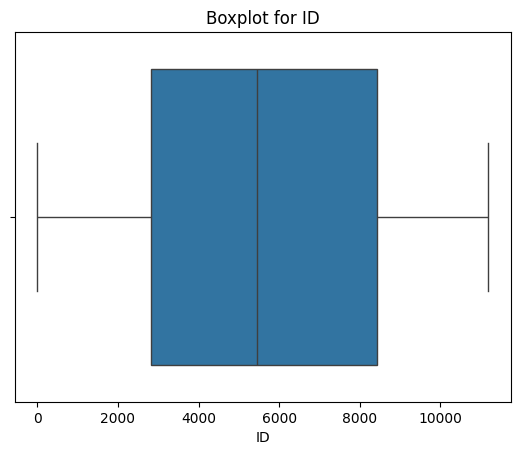

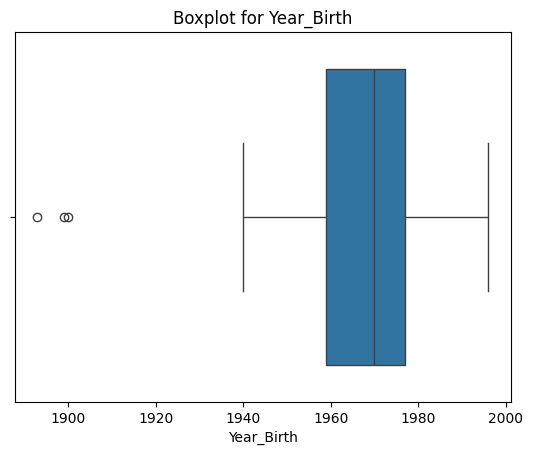

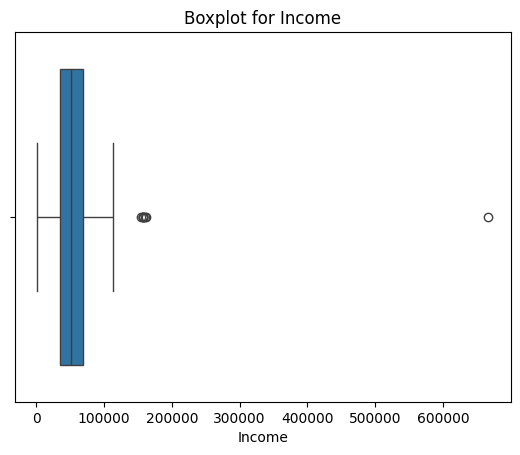

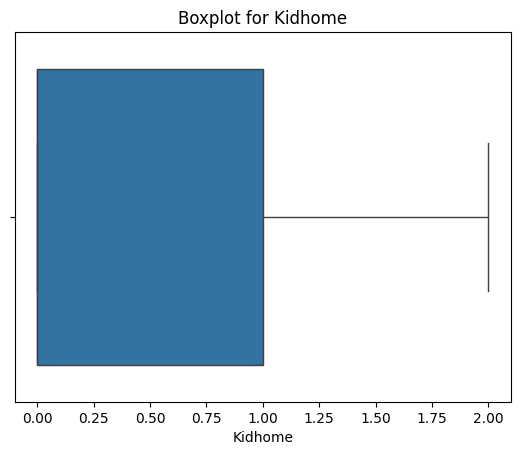

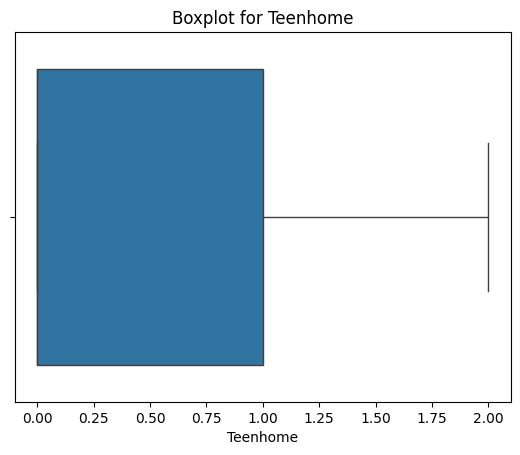

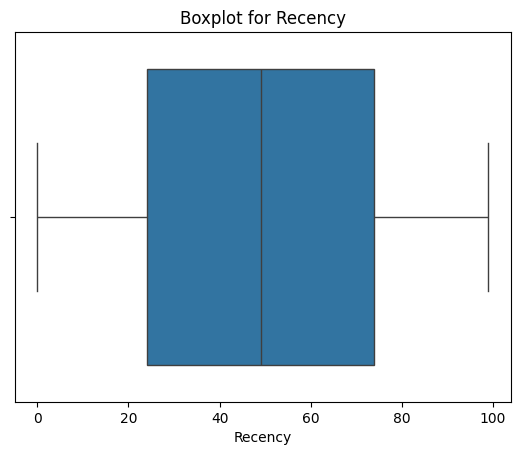

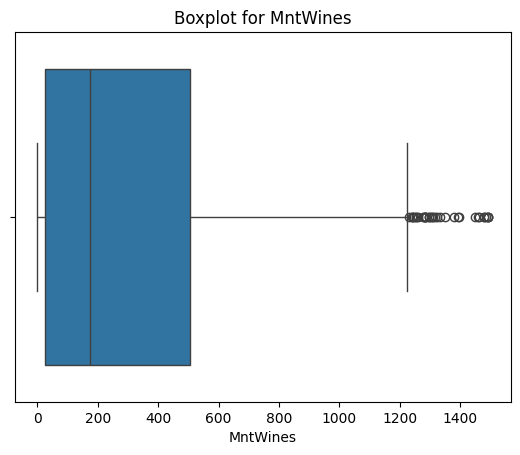

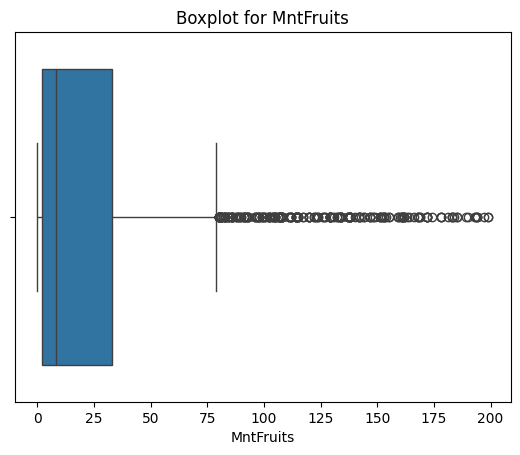

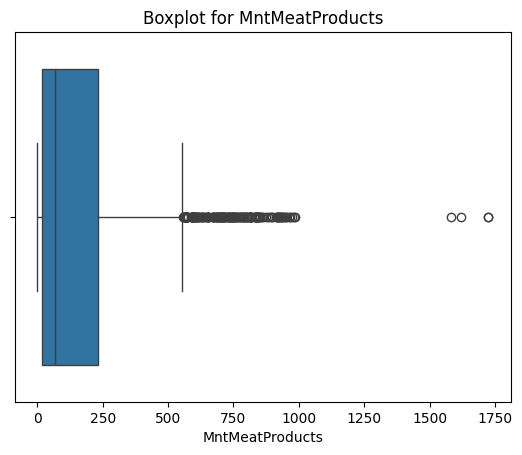

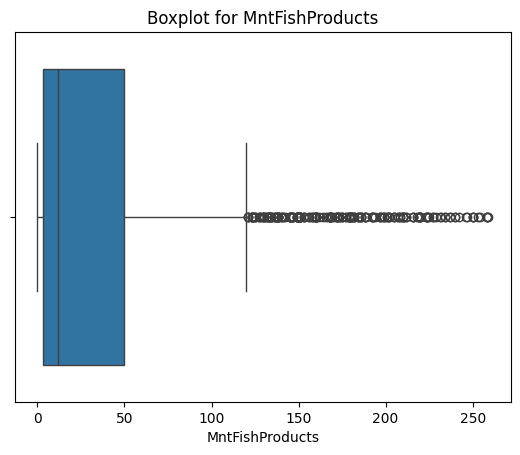

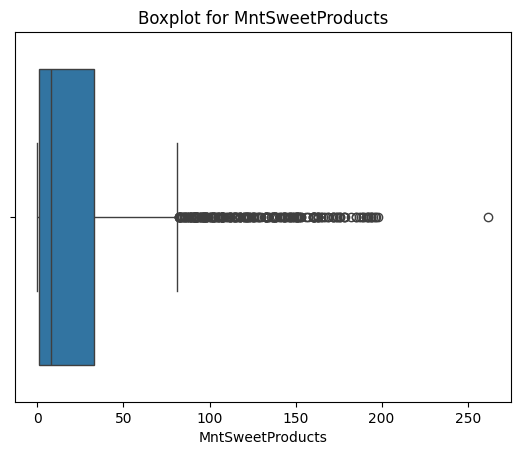

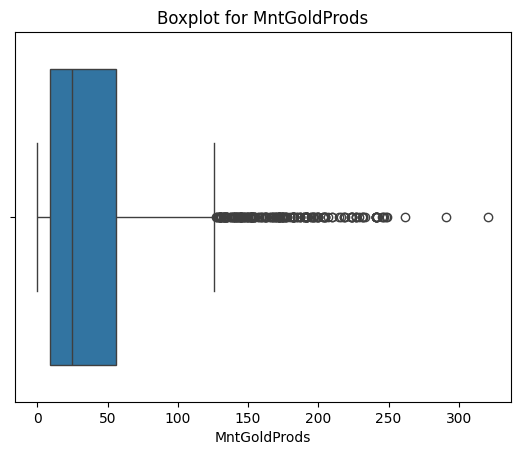

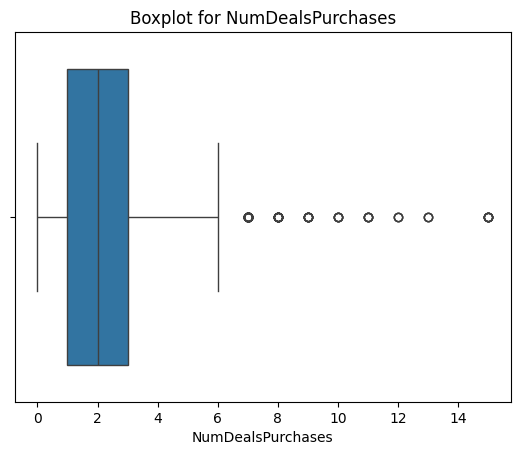

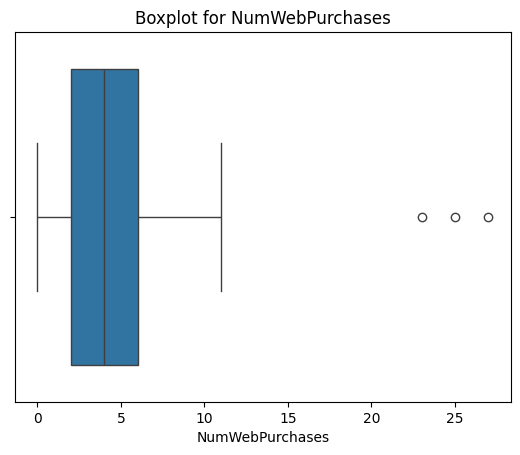

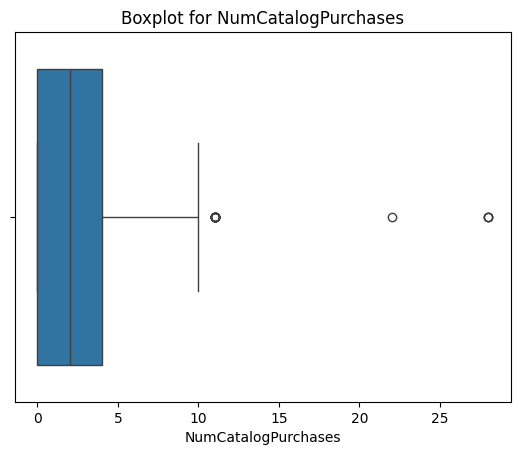

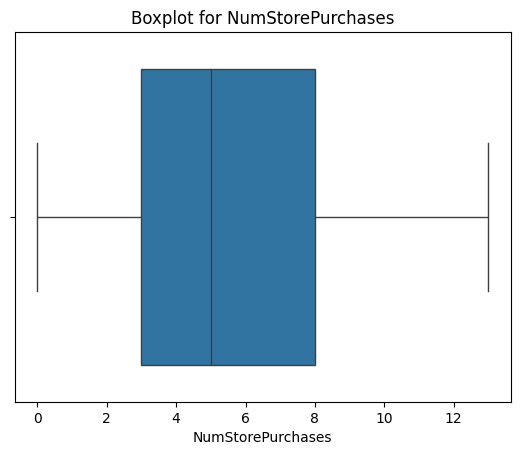

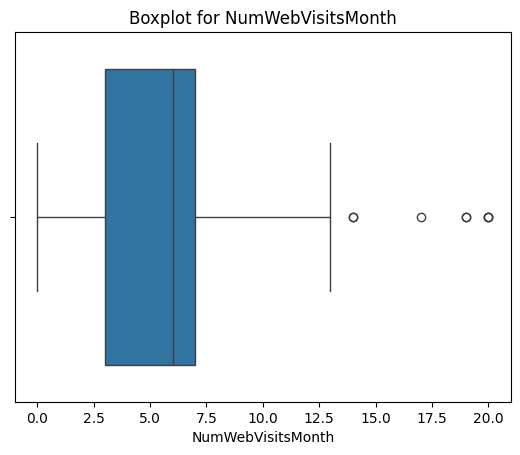

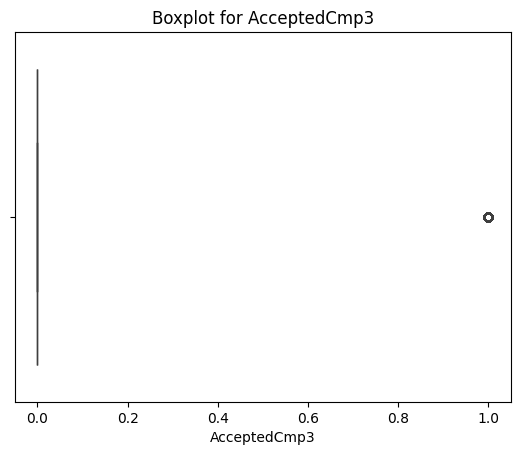

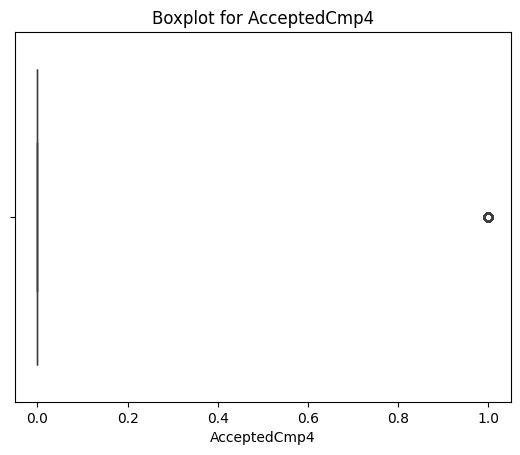

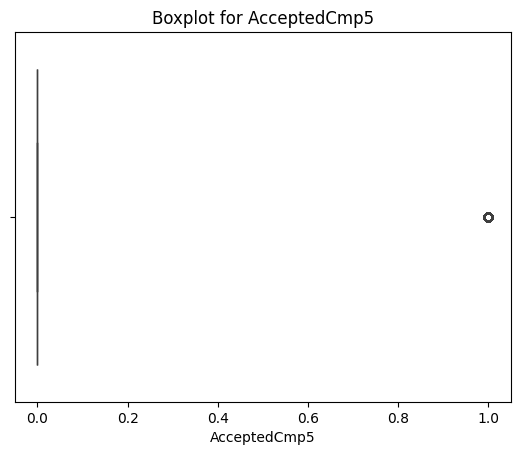

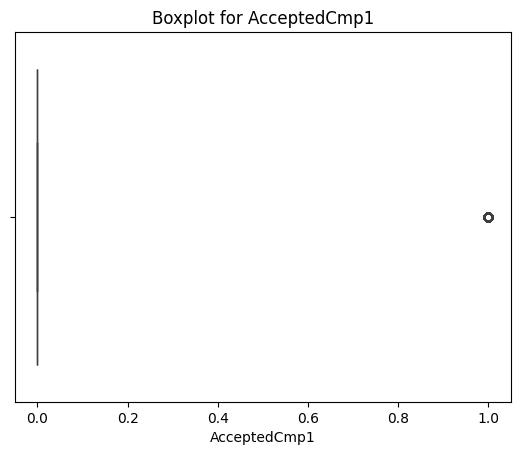

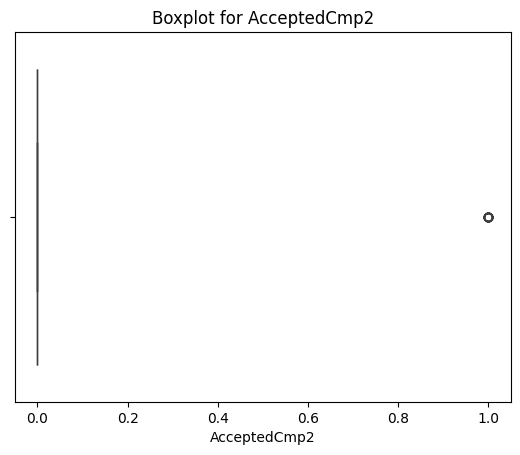

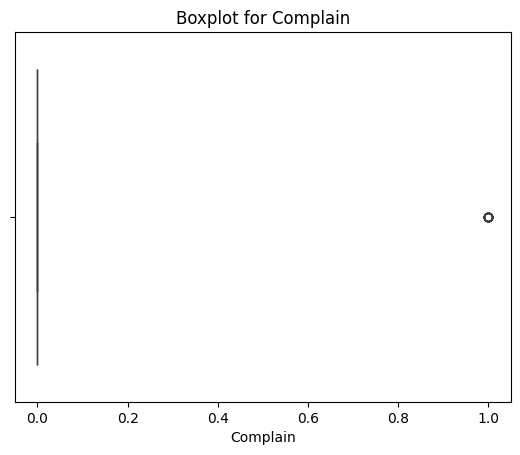

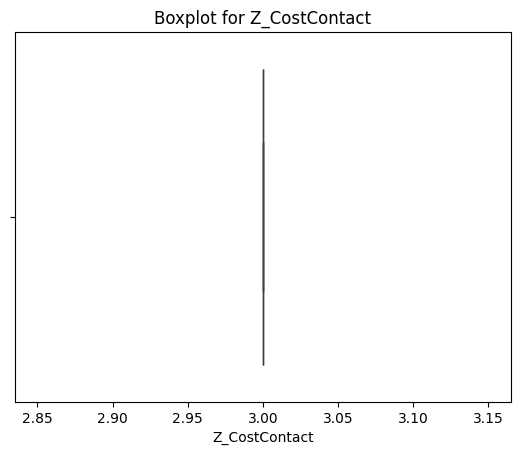

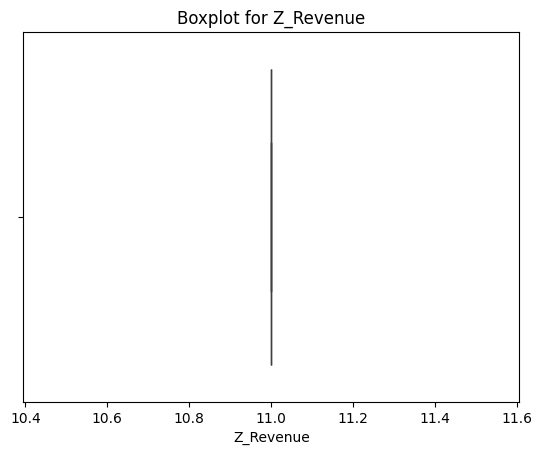

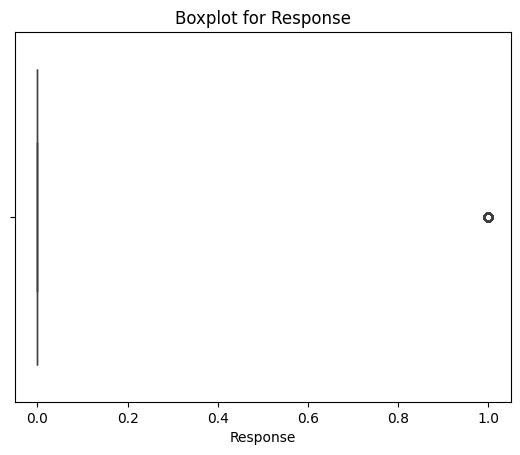

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = df.select_dtypes(include=[np.number]).columns
for column in numeric_columns:
    plt.figure()
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

In [13]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

outliers_iqr = detect_outliers_iqr(df, 'Year_Birth')
outliers_iqr

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,...,5,0,0,0,0,0,1,3,11,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,...,4,0,0,0,0,0,0,3,11,0
339,1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,...,1,0,0,1,0,0,0,3,11,0


In [14]:
# Drop outliers using their indices
data_cleaned = df.drop(outliers_iqr.index)

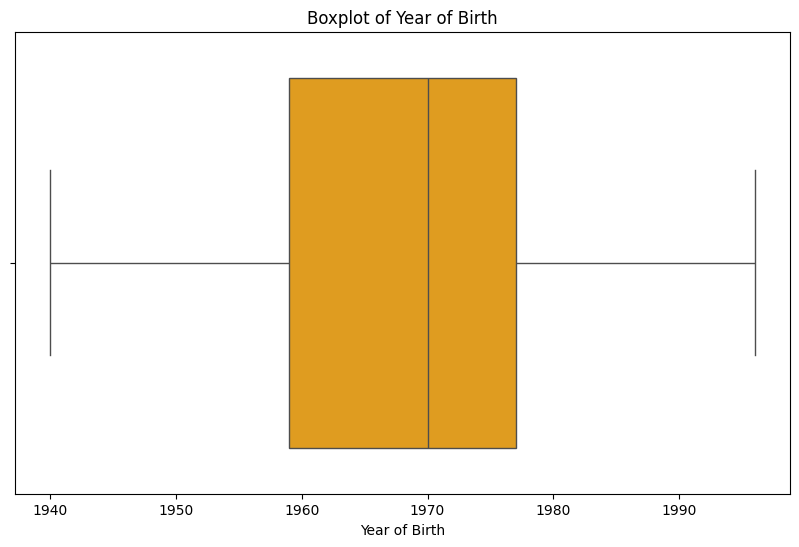

In [15]:
# Extract the 'Year_Birth' column
year_birth_data = data_cleaned['Year_Birth']

# Drop missing values
year_birth_data = year_birth_data.dropna()

# Create a DataFrame for the boxplot
year_birth_data_df = pd.DataFrame({'Year_Birth': year_birth_data})

# Create a horizontal boxplot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year_Birth', data=year_birth_data_df,color='orange')
plt.title('Boxplot of Year of Birth')
plt.xlabel('Year of Birth')
plt.show()

In [16]:
outliers_iqr = detect_outliers_iqr(df, 'Income')
outliers_iqr

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
164,8475,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,...,0,0,0,0,0,0,0,3,11,0
617,1503,1976,PhD,Together,162397.0,1,1,03-06-2013,31,85,...,1,0,0,0,0,0,0,3,11,0
655,5555,1975,Graduation,Divorced,153924.0,0,0,07-02-2014,81,1,...,0,0,0,0,0,0,0,3,11,0
687,1501,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,...,0,0,0,0,0,0,0,3,11,0
1300,5336,1971,Master,Together,157733.0,1,0,04-06-2013,37,39,...,1,0,0,0,0,0,0,3,11,0
1653,4931,1977,Graduation,Together,157146.0,0,0,29-04-2013,13,1,...,1,0,0,0,0,0,0,3,11,0
2132,11181,1949,PhD,Married,156924.0,0,0,29-08-2013,85,2,...,0,0,0,0,0,0,0,3,11,0
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,...,6,0,0,0,0,0,0,3,11,0


In [17]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 3 * IQR #Increase the upper bound to remove only the extreme outlier
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

outliers_iqr = detect_outliers_iqr(df, 'Income')
outliers_iqr

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,...,6,0,0,0,0,0,0,3,11,0


In [18]:
# Drop outliers using their indices
data_cleaned = df.drop(outliers_iqr.index)

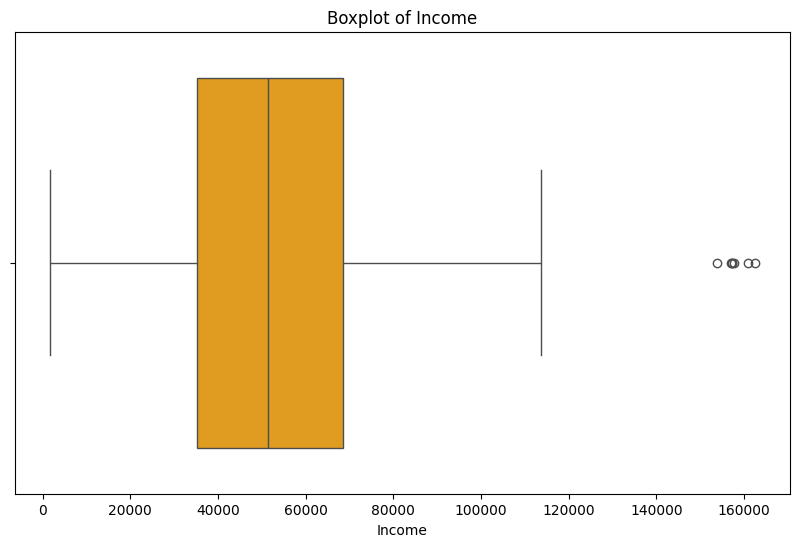

In [19]:
# Extract the 'Income' column
income_data = data_cleaned['Income']

# Create a DataFrame for the boxplot
income_data_df = pd.DataFrame({'Income': income_data})

# Create a horizontal boxplot using Seaborn with the color orange
plt.figure(figsize=(10, 6))
sns.boxplot(x='Income', data=income_data_df, color='orange')
plt.title('Boxplot of Income')
plt.xlabel('Income')
plt.show()

In [20]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 4 * IQR  # Increase the upper bound to remove only the extreme outlier
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

outliers_iqr = detect_outliers_iqr(df, 'MntMeatProducts')
outliers_iqr

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
21,5376,1979,Graduation,Married,2447.0,1,0,06-01-2013,42,1,...,1,0,0,0,0,0,0,3,11,0
164,8475,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,...,0,0,0,0,0,0,0,3,11,0
687,1501,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,...,0,0,0,0,0,0,0,3,11,0
1653,4931,1977,Graduation,Together,157146.0,0,0,29-04-2013,13,1,...,1,0,0,0,0,0,0,3,11,0


In [21]:
# Drop outliers using their indices
data_cleaned = df.drop(outliers_iqr.index)

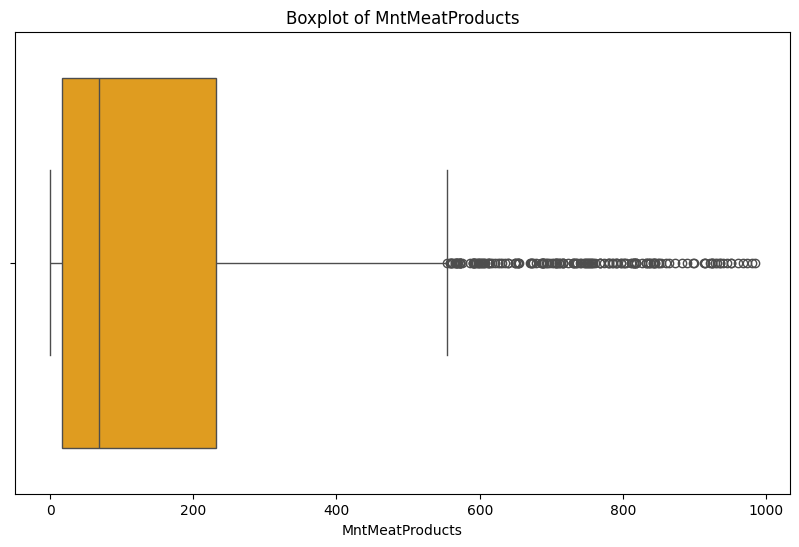

In [22]:
# Extract the 'MntMeatProducts' column
mnt_meat_products_data = data_cleaned['MntMeatProducts']

# Create a DataFrame for the boxplot
mnt_meat_products_data_df = pd.DataFrame({'MntMeatProducts': mnt_meat_products_data})

# Create a horizontal boxplot using Seaborn with the color orange
plt.figure(figsize=(10, 6))
sns.boxplot(x='MntMeatProducts', data=mnt_meat_products_data_df, color='orange')
plt.title('Boxplot of MntMeatProducts')
plt.xlabel('MntMeatProducts')
plt.show()

In [23]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 7 * IQR  # Increase the upper bound to remove only the extreme outlier
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

outliers_iqr = detect_outliers_iqr(df, 'MntSweetProducts')
outliers_iqr

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1898,4619,1945,PhD,Single,113734.0,0,0,28-05-2014,9,6,...,1,0,0,0,0,0,0,3,11,0


In [24]:
# Drop outliers using their indices
data_cleaned = df.drop(outliers_iqr.index)

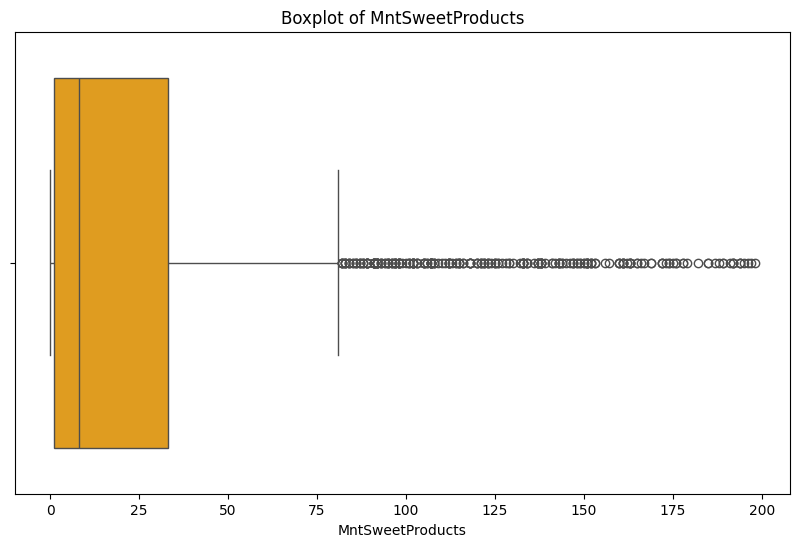

In [25]:
# Extract the 'MntSweetProducts' column
mnt_sweet_products_data = data_cleaned['MntSweetProducts']

# Create a DataFrame for the boxplot
mnt_sweet_products_data_df = pd.DataFrame({'MntSweetProducts': mnt_sweet_products_data})

# Create a horizontal boxplot using Seaborn with the color orange
plt.figure(figsize=(10, 6))
sns.boxplot(x='MntSweetProducts', data=mnt_sweet_products_data_df, color='orange')
plt.title('Boxplot of MntSweetProducts')
plt.xlabel('MntSweetProducts')
plt.show()

In [26]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 4 * IQR  # Increase the upper bound to remove only the extreme outlier
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

outliers_iqr = detect_outliers_iqr(df, 'MntGoldProds')
outliers_iqr

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
723,10936,1965,Graduation,Married,72190.0,0,0,13-02-2013,79,597,...,3,0,0,0,0,0,0,3,11,0
1328,4246,1982,Master,Single,6560.0,0,0,12-12-2013,2,67,...,17,0,0,0,0,0,0,3,11,0
1421,7000,1972,2n Cycle,Single,65704.0,0,0,13-10-2013,18,279,...,1,0,0,0,0,0,0,3,11,0
1806,6237,1966,PhD,Single,7144.0,0,2,07-12-2013,92,81,...,0,0,0,0,0,0,0,3,11,0
1975,10311,1969,Graduation,Married,4428.0,0,1,05-10-2013,0,16,...,1,0,0,0,0,0,0,3,11,0
2093,7734,1993,Graduation,Absurd,79244.0,0,0,19-12-2012,58,471,...,1,0,0,1,1,0,0,3,11,1
2173,6721,1951,Graduation,Married,71965.0,0,1,29-07-2013,21,572,...,3,0,0,0,0,0,0,3,11,0
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0


In [27]:
# Drop outliers using their indices
data_cleaned = df.drop(outliers_iqr.index)

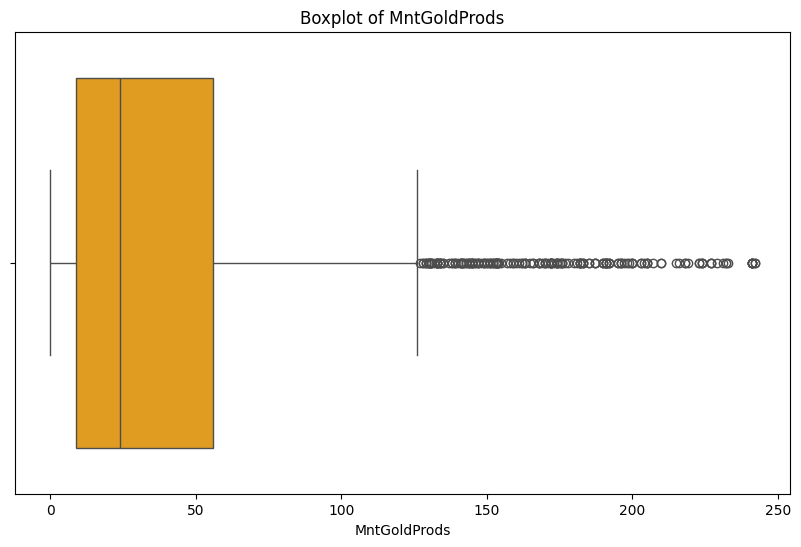

In [28]:
# Extract the 'MntGoldProds' column
mnt_gold_prods_data = data_cleaned['MntGoldProds']

# Create a DataFrame for the boxplot
mnt_gold_prods_data_df = pd.DataFrame({'MntGoldProds': mnt_gold_prods_data})

# Create a horizontal boxplot using Seaborn with the color orange
plt.figure(figsize=(10, 6))
sns.boxplot(x='MntGoldProds', data=mnt_gold_prods_data_df, color='orange')
plt.title('Boxplot of MntGoldProds')
plt.xlabel('MntGoldProds')
plt.show()

In [29]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR  # Increase the upper bound to remove only the extreme outlier
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

outliers_iqr = detect_outliers_iqr(df, 'NumCatalogPurchases')
outliers_iqr

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
21,5376,1979,Graduation,Married,2447.0,1,0,06-01-2013,42,1,...,1,0,0,0,0,0,0,3,11,0
104,8908,1959,Graduation,Married,87195.0,0,0,08-05-2014,35,217,...,1,0,0,0,0,0,0,3,11,1
164,8475,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,...,0,0,0,0,0,0,0,3,11,0
288,10102,1966,Graduation,Widow,79946.0,0,0,12-05-2014,19,395,...,3,0,0,0,0,0,0,3,11,0
586,9058,1955,Graduation,Widow,79800.0,0,0,23-09-2012,65,1060,...,3,1,0,1,1,0,0,3,11,1
591,7627,1975,Master,Married,92163.0,0,0,12-12-2012,25,817,...,2,0,0,1,1,0,0,3,11,1
627,4299,1960,Graduation,Together,70971.0,0,1,21-09-2012,28,1001,...,7,0,0,0,0,0,0,3,11,1
636,6945,1952,Graduation,Single,84574.0,0,0,04-06-2013,72,387,...,5,0,0,0,0,0,0,3,11,0
687,1501,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,...,0,0,0,0,0,0,0,3,11,0
764,4508,1952,Graduation,Single,75127.0,0,0,22-05-2014,92,203,...,1,0,0,0,0,0,0,3,11,0


In [30]:
# Drop outliers using their indices
data_cleaned = df.drop(outliers_iqr.index)

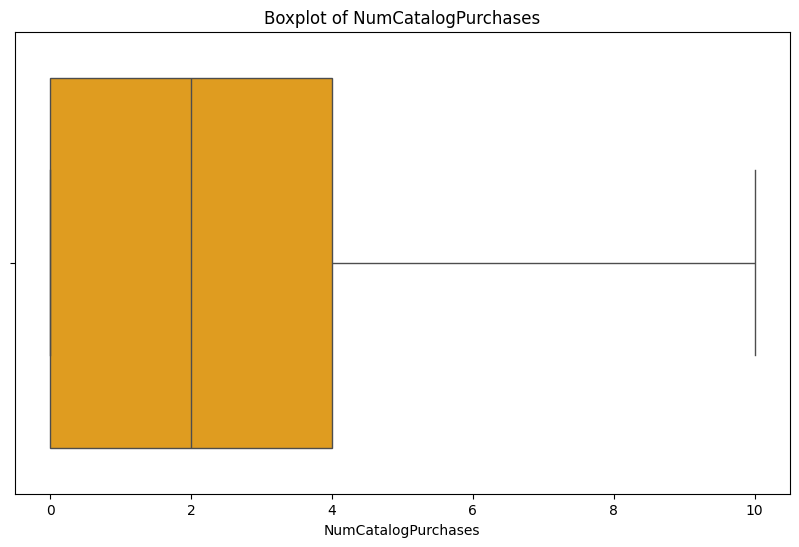

In [31]:
# Extract the 'NumCatalogPurchases' column
num_catalog_purchases_data = data_cleaned['NumCatalogPurchases']

# Create a DataFrame for the boxplot
num_catalog_purchases_data_df = pd.DataFrame({'NumCatalogPurchases': num_catalog_purchases_data})

# Create a horizontal boxplot using Seaborn with the color orange
plt.figure(figsize=(10, 6))
sns.boxplot(x='NumCatalogPurchases', data=num_catalog_purchases_data_df, color='orange')
plt.title('Boxplot of NumCatalogPurchases')
plt.xlabel('NumCatalogPurchases')
plt.show()

In [32]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR  # Increase the upper bound to remove only the extreme outlier
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

outliers_iqr = detect_outliers_iqr(df, 'NumWebVisitsMonth')
outliers_iqr

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0
774,4303,1957,PhD,Together,6835.0,0,1,08-12-2012,76,107,...,20,0,0,0,0,0,0,3,11,0
981,3955,1965,Graduation,Divorced,4861.0,0,0,22-06-2014,20,2,...,14,0,0,0,0,0,0,3,11,0
1042,10749,1991,Graduation,Single,8028.0,0,0,18-09-2012,62,73,...,19,0,0,0,0,0,0,3,11,0
1245,6862,1971,Graduation,Divorced,1730.0,0,0,18-05-2014,65,1,...,20,0,0,0,0,0,0,3,11,0
1328,4246,1982,Master,Single,6560.0,0,0,12-12-2013,2,67,...,17,0,0,0,0,0,0,3,11,0
1524,11110,1973,Graduation,Single,3502.0,1,0,13-04-2013,56,2,...,14,0,0,0,0,0,0,3,11,0
1846,9931,1963,PhD,Married,4023.0,1,1,23-06-2014,29,5,...,19,0,0,0,0,0,0,3,11,0


In [33]:
# Drop outliers using their indices
data_cleaned = df.drop(outliers_iqr.index)

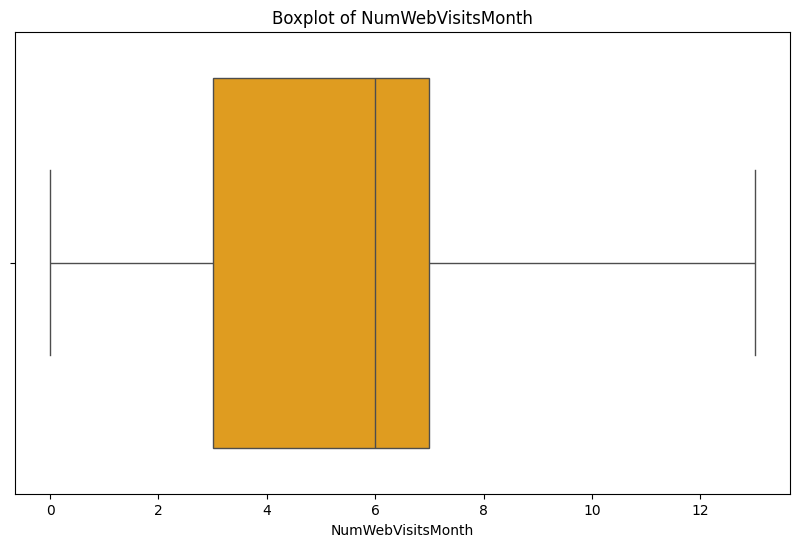

In [34]:
# Extract the 'NumWebVisitsMonth' column
num_web_visits_month_data = data_cleaned['NumWebVisitsMonth']

# Create a DataFrame for the boxplot
num_web_visits_month_data_df = pd.DataFrame({'NumWebVisitsMonth': num_web_visits_month_data})

# Create a horizontal boxplot using Seaborn with the color orange
plt.figure(figsize=(10, 6))
sns.boxplot(x='NumWebVisitsMonth', data=num_web_visits_month_data_df, color='orange')
plt.title('Boxplot of NumWebVisitsMonth')
plt.xlabel('NumWebVisitsMonth')
plt.show()

In [35]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2208 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2208 non-null   int64  
 1   Year_Birth           2208 non-null   int64  
 2   Education            2208 non-null   object 
 3   Marital_Status       2208 non-null   object 
 4   Income               2208 non-null   float64
 5   Kidhome              2208 non-null   int64  
 6   Teenhome             2208 non-null   int64  
 7   Dt_Customer          2208 non-null   object 
 8   Recency              2208 non-null   int64  
 9   MntWines             2208 non-null   int64  
 10  MntFruits            2208 non-null   int64  
 11  MntMeatProducts      2208 non-null   int64  
 12  MntFishProducts      2208 non-null   int64  
 13  MntSweetProducts     2208 non-null   int64  
 14  MntGoldProds         2208 non-null   int64  
 15  NumDealsPurchases    2208 non-null   int64 

##Duplicates

df.duplicated().sum() is used to count the duplicate rows in a DataFrame (df). It returns the total number of rows that are exact duplicates of other rows in the DataFrame. This method is useful for identifying and potentially removing duplicate data entries, ensuring data integrity and accuracy in analysis or modeling processes.

In [36]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
df.drop_duplicates(inplace=True)

Number of duplicate rows: 0


##Data Formatting

In [37]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2208 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2208 non-null   int64  
 1   Year_Birth           2208 non-null   int64  
 2   Education            2208 non-null   object 
 3   Marital_Status       2208 non-null   object 
 4   Income               2208 non-null   float64
 5   Kidhome              2208 non-null   int64  
 6   Teenhome             2208 non-null   int64  
 7   Dt_Customer          2208 non-null   object 
 8   Recency              2208 non-null   int64  
 9   MntWines             2208 non-null   int64  
 10  MntFruits            2208 non-null   int64  
 11  MntMeatProducts      2208 non-null   int64  
 12  MntFishProducts      2208 non-null   int64  
 13  MntSweetProducts     2208 non-null   int64  
 14  MntGoldProds         2208 non-null   int64  
 15  NumDealsPurchases    2208 non-null   int64 

If we look at the data info, the format of Dt_Customer is currently incorrect, which is object.

Therefore, it should be converted to a more appropriate format, which is datetime.Pandas function used to convert the 'Dt_Customer' column in the data_cleaned DataFrame into datetime format.

In [38]:
data_cleaned['Dt_Customer'] = pd.to_datetime(data_cleaned['Dt_Customer'], dayfirst=True)

In [39]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2208 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2208 non-null   int64         
 1   Year_Birth           2208 non-null   int64         
 2   Education            2208 non-null   object        
 3   Marital_Status       2208 non-null   object        
 4   Income               2208 non-null   float64       
 5   Kidhome              2208 non-null   int64         
 6   Teenhome             2208 non-null   int64         
 7   Dt_Customer          2208 non-null   datetime64[ns]
 8   Recency              2208 non-null   int64         
 9   MntWines             2208 non-null   int64         
 10  MntFruits            2208 non-null   int64         
 11  MntMeatProducts      2208 non-null   int64         
 12  MntFishProducts      2208 non-null   int64         
 13  MntSweetProducts     2208 non-null   i

### Outlier Handling After Data Formatting

After formatting the data correctly, I want to create age groups to facilitate analysis.

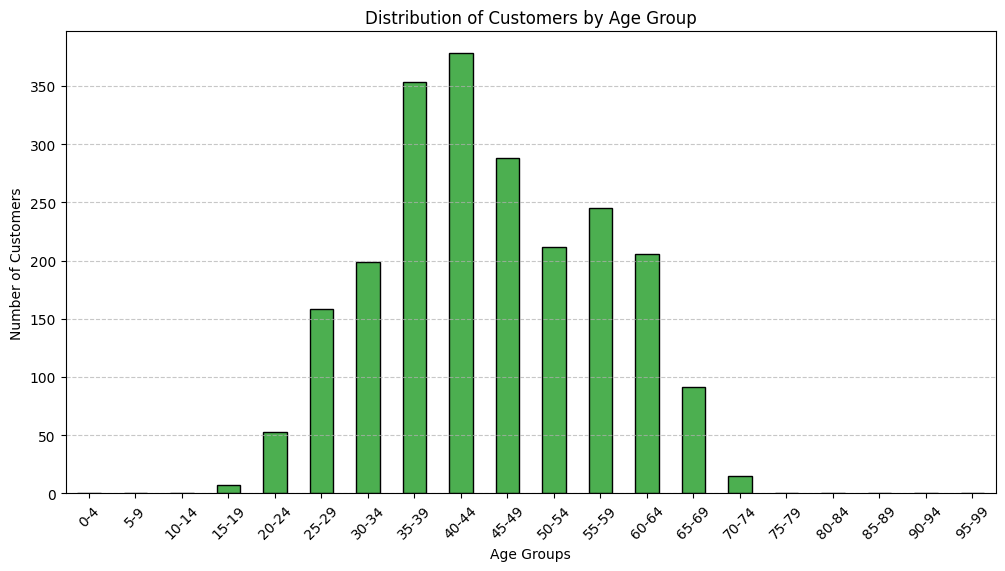

In [40]:
# Find the maximum year in Dt_Customer column
max_year = data_cleaned['Dt_Customer'].max().year

# Calculate age based on the max_year
data_cleaned['Age'] = max_year - data_cleaned['Year_Birth']

# Define age bins and labels
bins = list(range(0, 101, 5))  # [0, 5, 10, 15, ..., 100]
labels = [f'{i}-{i+4}' for i in range(0, 100, 5)]  # ['0-4', '5-9', '10-14', ..., '95-99']

# Create age groups
data_cleaned['Age_Group'] = pd.cut(data_cleaned['Age'], bins=bins, labels=labels, right=False)

# Plotting the age groups
plt.figure(figsize=(12, 6))
age_group_counts = data_cleaned['Age_Group'].value_counts(sort=False)
age_group_counts.plot(kind='bar', color='#4CAF50', edgecolor='black')

plt.title('Distribution of Customers by Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

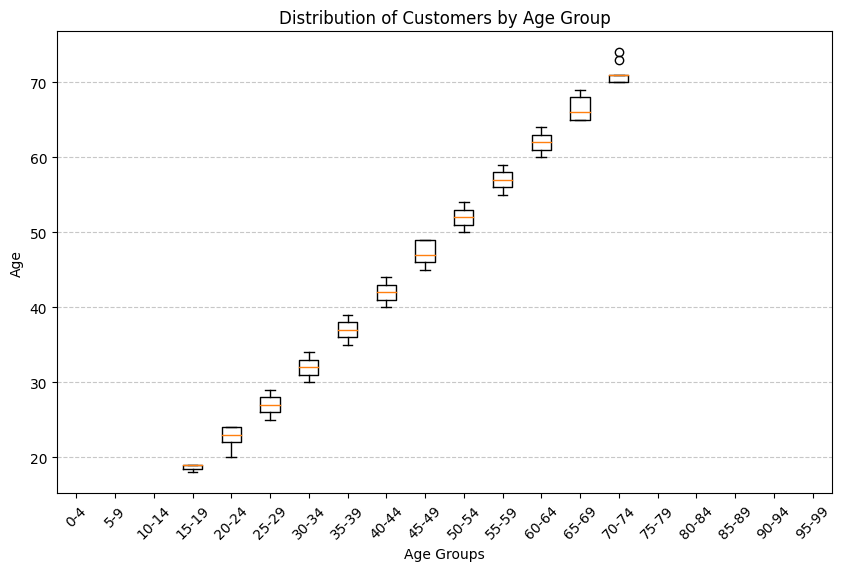

In [41]:
# Find the maximum year in Dt_Customer column
max_year = data_cleaned['Dt_Customer'].max().year

# Calculate age based on the max_year
data_cleaned['Age'] = max_year - data_cleaned['Year_Birth']

# Define age bins and labels
bins = list(range(0, 101, 5))  # [0, 5, 10, 15, ..., 100]
labels = [f'{i}-{i+4}' for i in range(0, 100, 5)]  # ['0-4', '5-9', '10-14', ..., '95-99']

# Create age groups
data_cleaned['Age_Group'] = pd.cut(data_cleaned['Age'], bins=bins, labels=labels, right=False)

# Plotting the boxplot of Age_Group
plt.figure(figsize=(10, 6))
plt.boxplot(data_cleaned.groupby('Age_Group')['Age'].apply(list), labels=labels)

plt.title('Distribution of Customers by Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [42]:
null_age_group_customers = data_cleaned[data_cleaned['Age_Group'].isnull()]

# Print IDs and Age
print("Customer IDs and Age with null Age_Group:")
for index, row in null_age_group_customers.iterrows():
    print(f"ID: {row['ID']}, Age: {row['Age']}")

Customer IDs and Age with null Age_Group:
ID: 7829, Age: 114
ID: 11004, Age: 121
ID: 1150, Age: 115


In [43]:
# Drop rows with null Age_Group
data_cleaned = data_cleaned.dropna(subset=['Age_Group'])

# Optional: Reset index if needed
data_cleaned.reset_index(drop=True, inplace=True)

# Print confirmation
print("Rows with null Age_Group dropped. New shape of DataFrame:", data_cleaned.shape)

Rows with null Age_Group dropped. New shape of DataFrame: (2205, 31)


In [44]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2205 non-null   int64         
 1   Year_Birth           2205 non-null   int64         
 2   Education            2205 non-null   object        
 3   Marital_Status       2205 non-null   object        
 4   Income               2205 non-null   float64       
 5   Kidhome              2205 non-null   int64         
 6   Teenhome             2205 non-null   int64         
 7   Dt_Customer          2205 non-null   datetime64[ns]
 8   Recency              2205 non-null   int64         
 9   MntWines             2205 non-null   int64         
 10  MntFruits            2205 non-null   int64         
 11  MntMeatProducts      2205 non-null   int64         
 12  MntFishProducts      2205 non-null   int64         
 13  MntSweetProducts     2205 non-nul

#Exploratory Data Analysis



##1. How is the distribution of supermarket customer demographics (e.g., age, education, marital status, income)?


Data visualization involves presenting data and information visually through charts, graphs, and maps. It helps explore patterns, understand complex data, communicate findings effectively and support decision-making.

###People

<ipython-input-45-720e57230be4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Age'] = max_year - data_cleaned['Year_Birth']
<ipython-input-45-720e57230be4>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Age_Group'] = pd.cut(data_cleaned['Age'], bins=bins, labels=labels, right=False)


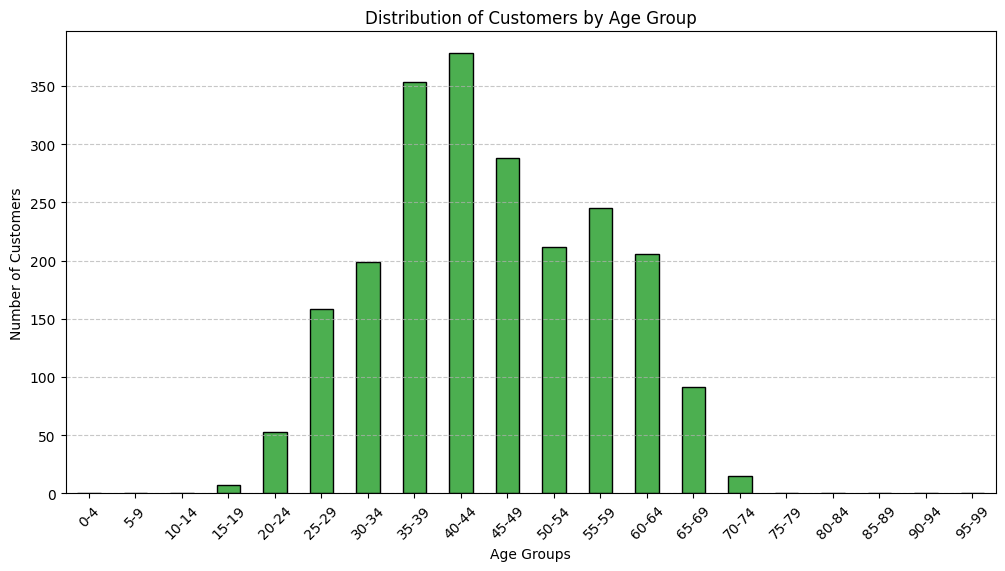

In [45]:
# Find the maximum year in Dt_Customer column
max_year = data_cleaned['Dt_Customer'].max().year

# Calculate age based on the max_year
data_cleaned['Age'] = max_year - data_cleaned['Year_Birth']

# Define age bins and labels
bins = list(range(0, 101, 5))  # [0, 5, 10, 15, ..., 100]
labels = [f'{i}-{i+4}' for i in range(0, 100, 5)]  # ['0-4', '5-9', '10-14', ..., '95-99']

# Create age groups
data_cleaned['Age_Group'] = pd.cut(data_cleaned['Age'], bins=bins, labels=labels, right=False)

# Plotting the age groups
plt.figure(figsize=(12, 6))
age_group_counts = data_cleaned['Age_Group'].value_counts(sort=False)
age_group_counts.plot(kind='bar', color='#4CAF50', edgecolor='black')

plt.title('Distribution of Customers by Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

The age group with the most customers is 35 - 44 years old.


In [46]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2205 non-null   int64         
 1   Year_Birth           2205 non-null   int64         
 2   Education            2205 non-null   object        
 3   Marital_Status       2205 non-null   object        
 4   Income               2205 non-null   float64       
 5   Kidhome              2205 non-null   int64         
 6   Teenhome             2205 non-null   int64         
 7   Dt_Customer          2205 non-null   datetime64[ns]
 8   Recency              2205 non-null   int64         
 9   MntWines             2205 non-null   int64         
 10  MntFruits            2205 non-null   int64         
 11  MntMeatProducts      2205 non-null   int64         
 12  MntFishProducts      2205 non-null   int64         
 13  MntSweetProducts     2205 non-nul

In [47]:
null_age_group_customers = data_cleaned[data_cleaned['Age_Group'].isnull()]

# Print IDs and Age
print("Customer IDs and Age with null Age_Group:")
for index, row in null_age_group_customers.iterrows():
    print(f"ID: {row['ID']}, Age: {row['Age']}")

Customer IDs and Age with null Age_Group:


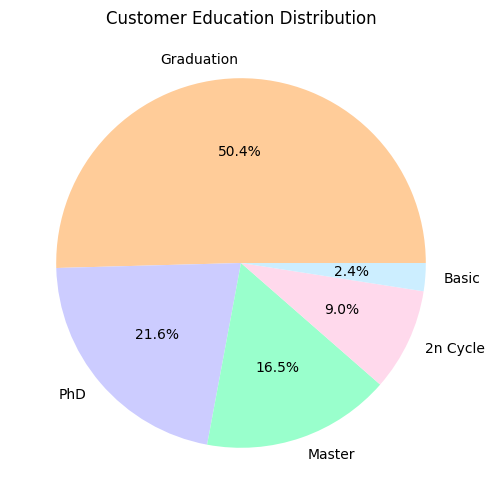

In [48]:
# Define pastel colors
colors = ['#FFCC99', '#CCCCFF', '#99FFCC', '#FFD9EC', '#CCEEFF']

# Pie Chart with calm pastel colors
plt.figure(figsize=(10, 6))
data_cleaned['Education'].value_counts().plot.pie(autopct='%1.1f%%', colors=colors)
plt.title('Customer Education Distribution')
plt.ylabel('')  # Remove the y-label to avoid duplication with legend
plt.show()

The majority of supermarket customers have an education level of 'Graduation'.


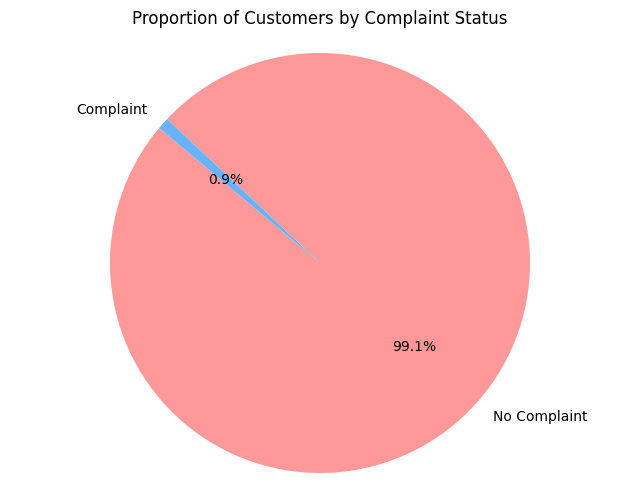

In [49]:
# Calculate counts of complaints
complain_counts = data_cleaned['Complain'].value_counts()

# Define pastel colors
colors = ['#FF9999', '#66B3FF']

# Pie Chart with pastel colors
plt.figure(figsize=(8, 6))
plt.pie(complain_counts, labels=complain_counts.index.map({0: 'No Complaint', 1: 'Complaint'}), autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Proportion of Customers by Complaint Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Only 1% of customers did complaint from the data.


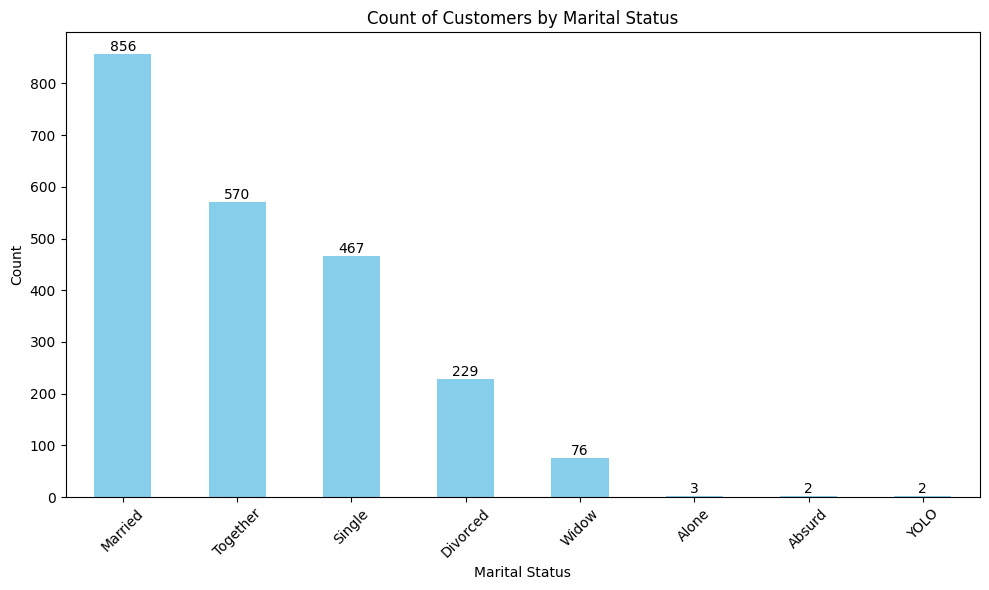

In [50]:

# Marital Status Distribution
marital_status_counts = data_cleaned['Marital_Status'].value_counts()

# Bar Chart with Data Labels
plt.figure(figsize=(10, 6))
bars = marital_status_counts.plot(kind='bar', color='skyblue')

plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Count of Customers by Marital Status')
plt.xticks(rotation=45)

# Add data labels (annotations)
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height(),
             f'{bar.get_height()}',
             ha='center',
             va='bottom')

plt.tight_layout()
plt.show()

Most customers have a marital status of 'Married’.

##2. How is expenditure by product categories and the association between product categories?


###Products

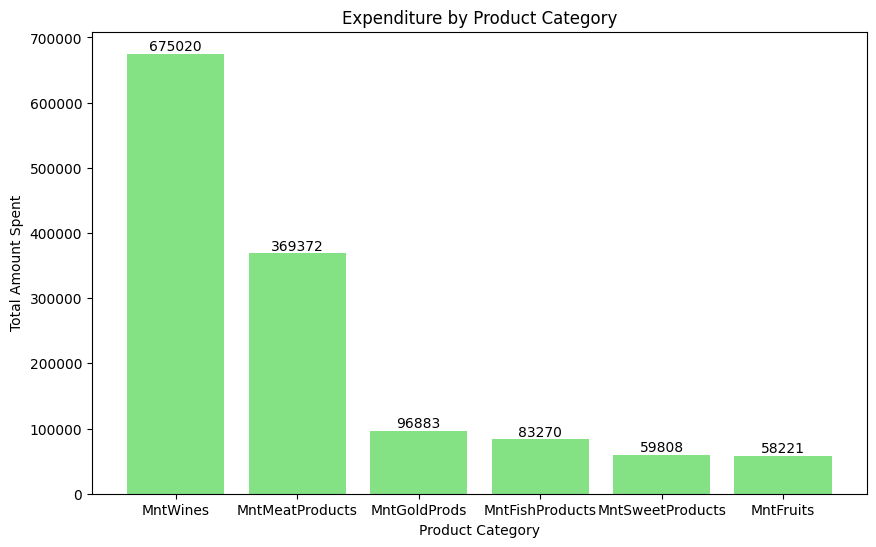

In [51]:
categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
spending_by_category = data_cleaned[categories].sum()

# Sort spending by descending order
spending_by_category = spending_by_category.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(spending_by_category.index, spending_by_category, color='limegreen', alpha=0.6)

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.title('Expenditure by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Amount Spent')
plt.show()

The highest expenditure is on the wine product category, followed by meat.

###People - Product

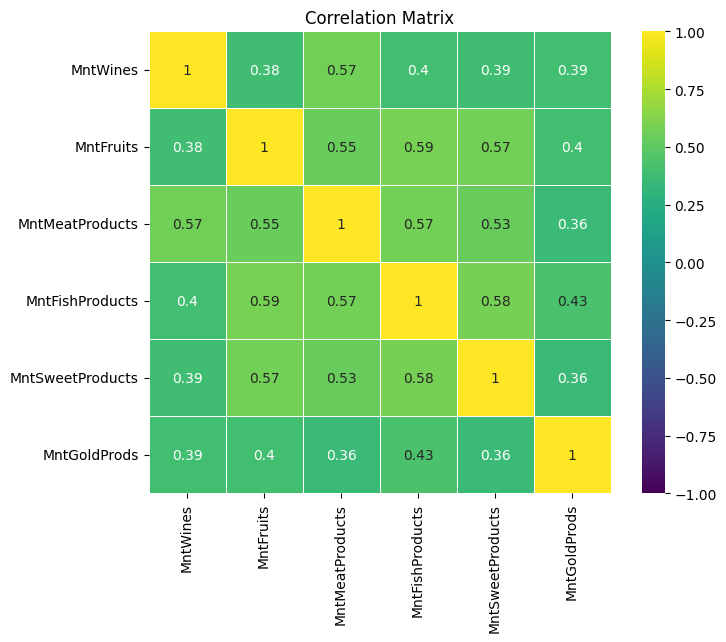

In [52]:
variables = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
correlation_matrix = data_cleaned[variables].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


Among the products available, overall, they all show positive correlations, with some products correlating "fairly strongly" at a value of > 0.5 on the matrix.

##3. What is the relationship between the distribution of supermarket customer demographics and their spending across different product categories?

###People - Product

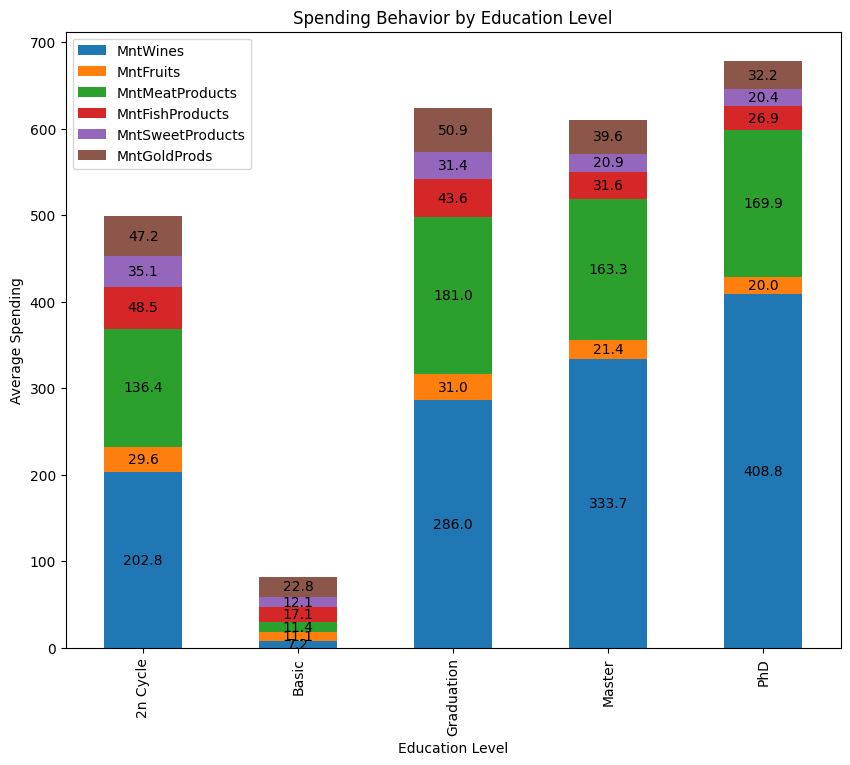

In [53]:
# Calculate average spending based on education level
education_spending = data_cleaned.groupby('Education')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

# Create a stacked bar plot
ax = education_spending.plot(kind='bar', stacked=True, figsize=(10, 8))

# Add title and axis labels
plt.title('Spending Behavior by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Spending')

# Add data labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='center')

# Show the plot
plt.show()

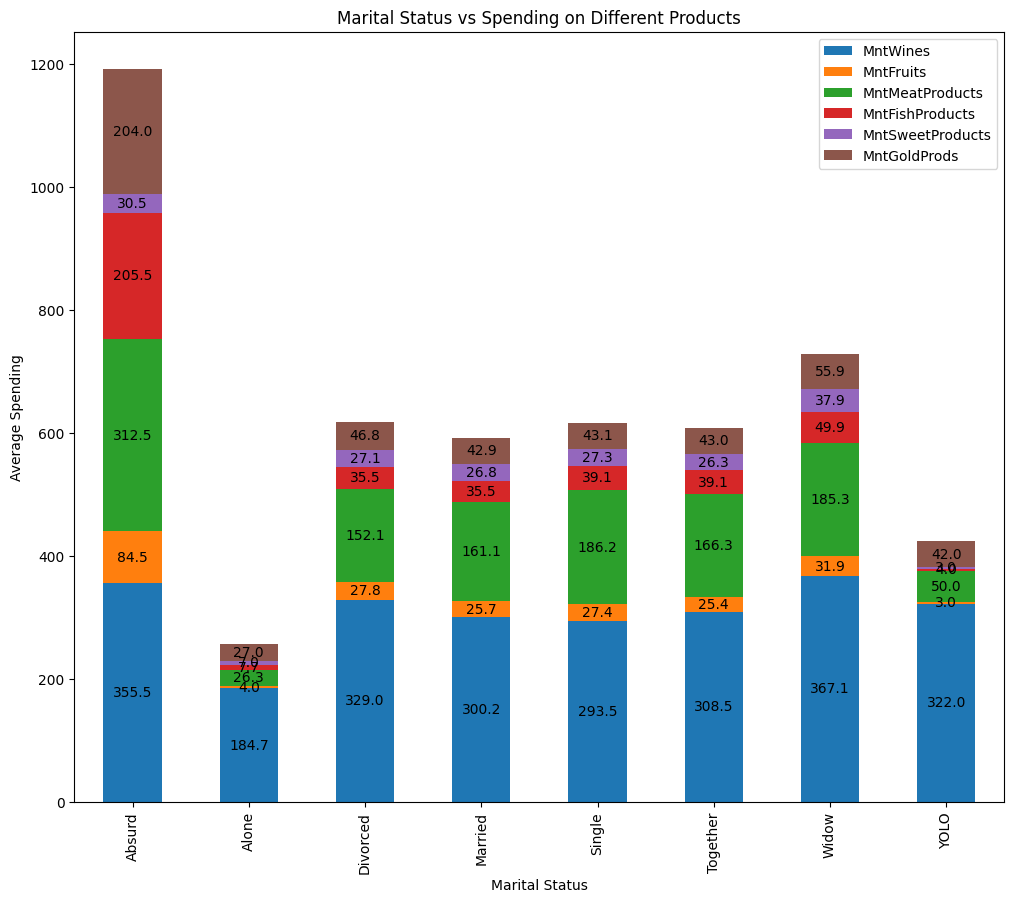

In [54]:
# Calculate average spending based on marital status
marital_spending = data_cleaned.groupby('Marital_Status')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

# Create a stacked bar plot with increased figsize
fig, ax = plt.subplots(figsize=(12, 10))
marital_spending.plot(kind='bar', stacked=True, ax=ax)

# Add title and axis labels
plt.title('Marital Status vs Spending on Different Products')
plt.xlabel('Marital Status')
plt.ylabel('Average Spending')

# Add data labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='center')

# Show the plot
plt.show()

##4. How are the results of the promotional campaign conducted by the supermarket?


##Promotion

To assess the "success" rate of the campaign, we create a bar chart showing the percentage of promotional campaigns by comparing campaign responses to the total number of customers in each campaign.

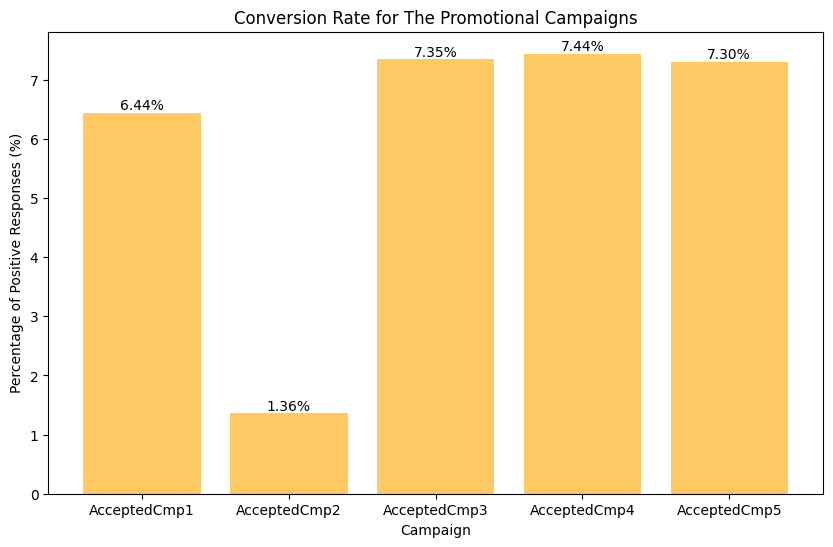

In [55]:
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
campaign_responses = round(((data_cleaned[campaigns].sum()/data_cleaned[campaigns].count())*100),4)
# campaign_responses = data_cleaned[campaigns].count()

plt.figure(figsize=(10, 6))
bars = plt.bar(campaign_responses.index, campaign_responses, color='orange', alpha=0.6)

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')
    # plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.title('Conversion Rate for The Promotional Campaigns')
plt.xlabel('Campaign')
plt.ylabel('Percentage of Positive Responses (%)')
plt.show()


It was found that overall, most campaigns performed quite well with values above 5%, except for the second campaign which had a low value.








##5. How do customers of a supermarket use shopping channels?

###Places

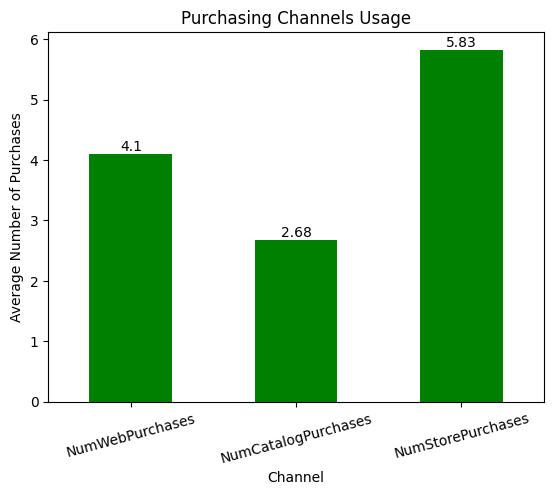

In [56]:
channel_usage = data_cleaned[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].mean()
ax = channel_usage.plot(kind='bar', color='green')

# Adding data labels
for i in range(len(channel_usage)):
    plt.text(i, channel_usage[i] + 0.05, round(channel_usage[i], 2), ha='center')

plt.xticks(rotation=15)

plt.title('Purchasing Channels Usage')
plt.xlabel('Channel')
plt.ylabel('Average Number of Purchases')
plt.show()

The average number of purchases from the store is higher than other channels.

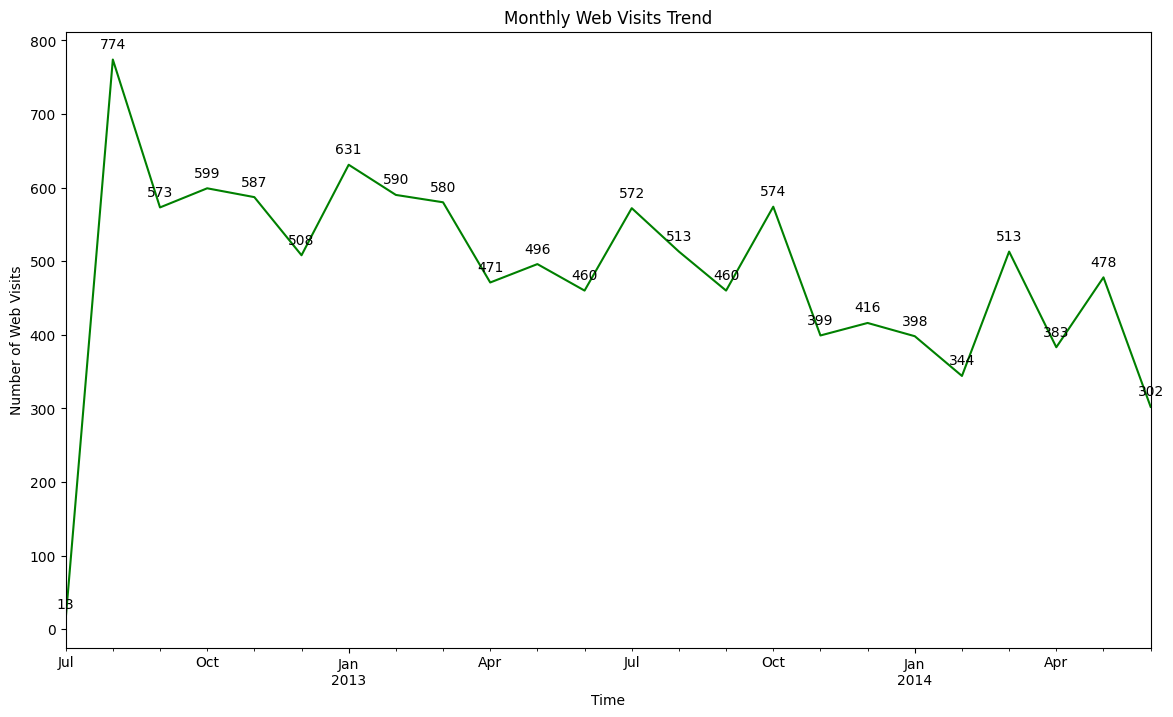

In [57]:
# Resample the data to get monthly sums
web_visits_monthly = data_cleaned.set_index('Dt_Customer').resample('M')['NumWebVisitsMonth'].sum()

# Create a plot with an increased figure size
plt.figure(figsize=(14, 8))
ax = web_visits_monthly.plot(color='green')

# Adding data labels
for i in range(len(web_visits_monthly)):
    plt.annotate(str(web_visits_monthly[i]),
                 xy=(web_visits_monthly.index[i], web_visits_monthly[i]),
                 xytext=(web_visits_monthly.index[i], web_visits_monthly[i] + 0.02 * web_visits_monthly.max()),
                 ha='center')

# Set plot titles and labels
plt.title('Monthly Web Visits Trend')
plt.xlabel('Time')
plt.ylabel('Number of Web Visits')

# Display the plot
plt.show()

#Descriptive Statistics

In [58]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2205 non-null   int64         
 1   Year_Birth           2205 non-null   int64         
 2   Education            2205 non-null   object        
 3   Marital_Status       2205 non-null   object        
 4   Income               2205 non-null   float64       
 5   Kidhome              2205 non-null   int64         
 6   Teenhome             2205 non-null   int64         
 7   Dt_Customer          2205 non-null   datetime64[ns]
 8   Recency              2205 non-null   int64         
 9   MntWines             2205 non-null   int64         
 10  MntFruits            2205 non-null   int64         
 11  MntMeatProducts      2205 non-null   int64         
 12  MntFishProducts      2205 non-null   int64         
 13  MntSweetProducts     2205 non-nul

In [59]:
import pandas as pd
from datetime import datetime

# Assuming the current year is needed for age calculation
max_year = datetime.now().year

# Calculate Age
data_cleaned['Age'] = max_year - data_cleaned['Year_Birth']

# Adjust display settings
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 500)         # Set the width of the display

# Descriptive statistics for numeric variables
numerical_columns = data_cleaned.select_dtypes(include=['int64', 'float64']).columns
numerical_stats = data_cleaned[numerical_columns].describe()

# Convert count, min, and max to integers
numerical_stats.loc['count'] = numerical_stats.loc['count'].astype(int)
numerical_stats.loc['min'] = numerical_stats.loc['min'].astype(int)
numerical_stats.loc['max'] = numerical_stats.loc['max'].astype(int)

# Round mean and std to two decimal places
numerical_stats.loc['mean'] = numerical_stats.loc['mean'].round(2)
numerical_stats.loc['std'] = numerical_stats.loc['std'].round(2)

# Descriptive statistics for categorical variables
categorical_columns = data_cleaned.select_dtypes(include=['object', 'category']).columns
categorical_stats = data_cleaned[categorical_columns].describe()

# Additional statistics for categorical variables (mode and value counts)
additional_categorical_stats = {}
for col in categorical_columns:
    mode_value = data_cleaned[col].mode()[0]
    value_counts = data_cleaned[col].value_counts()
    additional_categorical_stats[col] = {
        'mode': mode_value,
        'value_counts': value_counts
    }

# Displaying results
print("Descriptive Statistics for Numeric Variables:")
print(numerical_stats)
print("\nDescriptive Statistics for Categorical Variables:")
print(categorical_stats)
print("\nAdditional Statistics for Categorical Variables:")
for col, stats in additional_categorical_stats.items():
    print(f"\n{col}:\nMode: {stats['mode']}\nValue Counts:\n{stats['value_counts']}")

Descriptive Statistics for Numeric Variables:
             ID  Year_Birth     Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response      Age
count   2205.00     2205.00    2205.00  2205.00   2205.00  2205.00   2205.00    2205.00          2205.00          2205.00           2205.00       2205.00            2205.00          2205.00              2205.00            2205.00            2205.00       2205.00       2205.00       2205.00       2205.00       2205.00   2205.00         2205.0     2205.0   2205.00  2205.00
mean    5581.29     1968.92   52407.42     0.44      0.51    49.01    306.13      26.40           167.52            37.76             27.12         43.94               2.31             4.10                 

# Statistical inference


Since "Wine" product contributes the most to the supermarker sales, I'd like to check whether there is any correlation between 'Wine' and 'Income' variables.

We have to do normality test before define the statistic test method to check the correlation.

In [60]:
import pandas as pd
from scipy.stats import pearsonr

# Step 1: Ensure the DataFrame is loaded (assumed it's already loaded as data_cleaned)
# data_cleaned = ... (This should already be defined in your workspace)

# Step 2: Extract the relevant columns
income = data_cleaned['Income']
mnt_wines = data_cleaned['MntWines']

# Step 3: Perform the Pearson Correlation Coefficient test
correlation, p_value = pearsonr(income, mnt_wines)

# Step 4: Print the results
print(f'Pearson Correlation Coefficient: {correlation}')
print(f'P-value: {p_value}')

# Interpretation of the result
if p_value < 0.05:
    print('There is a significant correlation between Income and MntWines.')
else:
    print('There is no significant correlation between Income and MntWines.')

Pearson Correlation Coefficient: 0.5773926806742413
P-value: 2.943431794824012e-196
There is a significant correlation between Income and MntWines.


In [61]:
import pandas as pd
import scipy.stats as stats

In [62]:
from scipy.stats import kruskal
import pandas as pd

# Assuming 'data_cleaned' is your dataframe with 'Education' and 'Income' columns
# Drop any missing values
data_subset = data_cleaned[['Education', 'Income']].dropna()

# Prepare data for Kruskal-Wallis test
education_groups = []
for edu_level, group_data in data_subset.groupby('Education')['Income']:
    education_groups.append(group_data)

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(*education_groups)

# Print Kruskal-Wallis test results
print("Kruskal-Wallis Test Results:")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print(f"\nConclusion: There is a significant difference in mean Income based on Education (p-value = {p_value})")
else:
    print(f"\nConclusion: There is no significant difference in mean Income based on Education (p-value = {p_value})")

Kruskal-Wallis Test Results:
Statistic: 144.97694517260751
P-value: 2.4259149734750136e-30

Conclusion: There is a significant difference in mean Income based on Education (p-value = 2.4259149734750136e-30)


In [63]:
import pandas as pd
from scipy.stats import shapiro, kruskal
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming 'data_cleaned' is your dataframe
income = data_cleaned['Income'].dropna()
education = data_cleaned['Education'].dropna()

# Perform Shapiro-Wilk test for normality on Income
stat_income, p_income = shapiro(income)

# Print Shapiro-Wilk test results for Income
print("Shapiro-Wilk Test for Income:")
print("Statistic:", stat_income)
print("p-value:", p_income)

alpha = 0.05
if p_income > alpha:
    print('Conclusion: Income is normally distributed.')
    use_anova = True
else:
    print('Conclusion: Income is not normally distributed.')
    use_anova = False

# If Income is not normally distributed, use Kruskal-Wallis test
if not use_anova:
    # Assuming 'data_cleaned' is your dataframe with 'Education' and 'Income' columns
    # Drop any missing values
    data_subset = data_cleaned[['Education', 'Income']].dropna()

    # Prepare data for Kruskal-Wallis test
    education_groups = []
    for edu_level, group_data in data_subset.groupby('Education')['Income']:
        education_groups.append(group_data)

    # Perform Kruskal-Wallis test
    statistic, p_value = kruskal(*education_groups)

    # Print Kruskal-Wallis test results
    print("\nKruskal-Wallis Test Results:")
    print(f"Statistic: {statistic}")
    print(f"P-value: {p_value}")

    # Interpretation
    if p_value < alpha:
        print(f"\nConclusion: There is a significant difference in mean Income based on Education (p-value = {p_value})")
    else:
        print(f"\nConclusion: There is no significant difference in mean Income based on Education (p-value = {p_value})")
else:
    # Perform ANOVA if Income is normally distributed
    # Assuming 'data_cleaned' is your dataframe with 'Education' and 'Income' columns
    # Drop any missing values
    data_subset = data_cleaned[['Education', 'Income']].dropna()

    # Perform ANOVA
    model = ols('Income ~ Education', data=data_subset).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)

    # Print ANOVA table
    print("\nANOVA Results:")
    print(anova_table)

    # Interpretation
    p_value = anova_table['PR(>F)'][0]  # p-value for 'Education' factor

    if p_value < alpha:
        print(f"\There is significant evidence to reject the null hypothesis.")
        print(f"\nConclusion: There is a significant difference in mean Income based on Education (p-value = {p_value})")
    else:
        print(f"\There is no significant evidence to reject the null hypothesis.")
        print(f"\nConclusion: There is no significant difference in mean Income based on Education (p-value = {p_value})")


Shapiro-Wilk Test for Income:
Statistic: 0.7728008031845093
p-value: 0.0
Conclusion: Income is not normally distributed.

Kruskal-Wallis Test Results:
Statistic: 144.97694517260751
P-value: 2.4259149734750136e-30

Conclusion: There is a significant difference in mean Income based on Education (p-value = 2.4259149734750136e-30)


In [64]:
from scipy.stats import shapiro

# Assuming 'data_cleaned' is your dataframe and 'NumWebPurchases' is the column of interest
num_web_purchases = data_cleaned['NumWebPurchases'].dropna()

# Perform Shapiro-Wilk test for normality on NumWebPurchases
stat_num_web, p_num_web = shapiro(num_web_purchases)

# Print Shapiro-Wilk test results for NumWebPurchases
print("Shapiro-Wilk Test for NumWebPurchases:")
print("Statistic:", stat_num_web)
print("p-value:", p_num_web)

alpha = 0.05
if p_num_web > alpha:
    print('Conclusion: NumWebPurchases is normally distributed.')
else:
    print('Conclusion: NumWebPurchases is not normally distributed.')

Shapiro-Wilk Test for NumWebPurchases:
Statistic: 0.9077116847038269
p-value: 1.3232506616839133e-34
Conclusion: NumWebPurchases is not normally distributed.


In [65]:
education_values = data_cleaned['Education'].unique()

print("Unique values 'Education':")
for edu in education_values:
    print(edu)

Unique values 'Education':
Graduation
PhD
Master
Basic
2n Cycle


In [66]:
# Calculate total NumWebPurchases based on education level
web_purchases_by_education = df.groupby('Education')['NumWebPurchases'].sum().reset_index()

# Print the result
print("Total NumWebPurchases by Education level:")
print(web_purchases_by_education)

Total NumWebPurchases by Education level:
    Education  NumWebPurchases
0    2n Cycle              753
1       Basic              102
2  Graduation             4593
3      Master             1473
4         PhD             2132


In [67]:
# Perform Kruskal-Wallis test
h_statistic, p_value = stats.kruskal(*education_groups)

# Print the results
print("Kruskal-Wallis Test:")
print(f"H-Statistic: {h_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("There is significant evidence to reject the null hypothesis.")
    print("There is a significant difference in NumWebPurchases among education levels.")
else:
    print("There is not enough evidence to reject the null hypothesis.")
    print("There is no significant difference in NumWebPurchases among education levels.")

Kruskal-Wallis Test:
H-Statistic: 144.97694517260751
P-value: 2.4259149734750136e-30
There is significant evidence to reject the null hypothesis.
There is a significant difference in NumWebPurchases among education levels.
